In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 1000
DIMENSION_SIZE = 2
CONSTRAINTS = (-10, 10)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

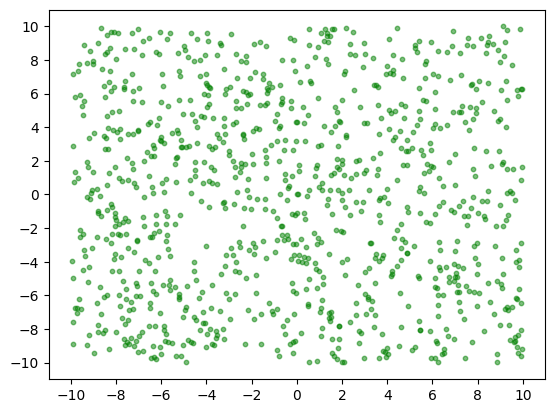

In [4]:
x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def test_eval_function(pop: Sequence[float]):
    pop_array = np.array(pop)
    pop_array = pop_array + np.array([4, -2])
    return np.sum(np.power(pop_array, 2))


test_eval_function([3, 5])

58

In [6]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[test_eval_function],
    mutation_function=square_mutation,
    mating_function=np.mean,
)

In [7]:
algo.get_best()

array([[-4.11339117,  1.92467037]])

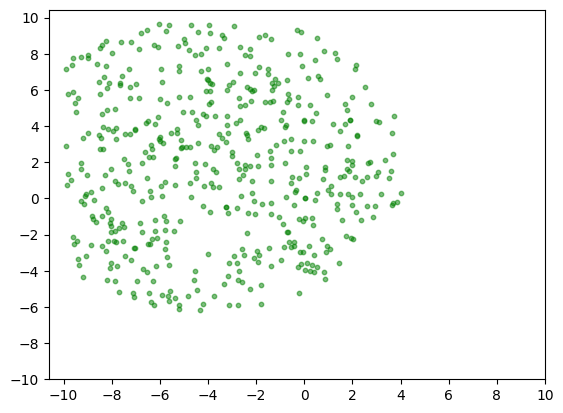

In [8]:
algo.select(keep_share=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

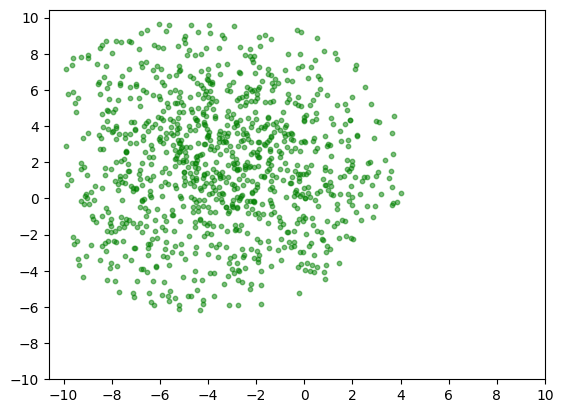

In [9]:
algo.mate()

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

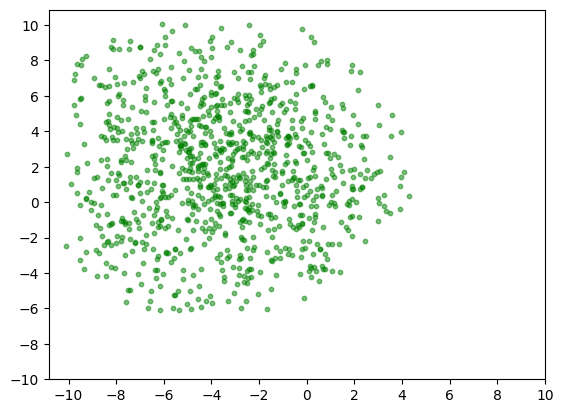

In [10]:
algo.mutate(delta=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

array([[-4.2943375 ,  1.93903287]])

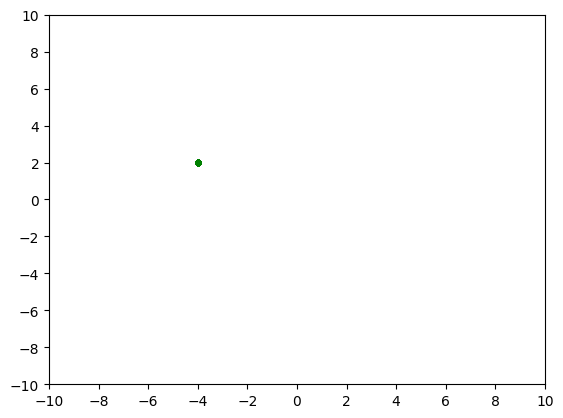

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

array([[-4.00025973,  2.000082  ]])